In [ ]:
!wget http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz

--2022-09-09 00:54:17--  http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www.eecs.berkeley.edu (www.eecs.berkeley.edu)... 23.185.0.1, 2620:12a:8001::1, 2620:12a:8000::1
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2022-09-09 00:54:17--  https://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Connecting to www.eecs.berkeley.edu (www.eecs.berkeley.edu)|23.185.0.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz [following]
--2022-09-09 00:54:17--  https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
Resolving www2.eecs.berkeley.edu (ww

In [ ]:
!tar -xvf "/content/BSR_bsds500.tgz"

BSR/
BSR/documentation/
BSR/documentation/Arbelaez_Maire_Fowlkes_Malik_TPAMI2010.pdf
BSR/bench/
BSR/bench/source/
BSR/bench/source/match.hh
BSR/bench/source/Matrix.cc
BSR/bench/source/Timer.cc
BSR/bench/source/csa_types.h
BSR/bench/source/csa.cc
BSR/bench/source/correspondPixels.cc
BSR/bench/source/build.sh
BSR/bench/source/match.cc
BSR/bench/source/Sort.hh
BSR/bench/source/csa_defs.h
BSR/bench/source/Timer.hh
BSR/bench/source/Exception.cc
BSR/bench/source/String.cc
BSR/bench/source/Array.hh
BSR/bench/source/kofn.hh
BSR/bench/source/Random.hh
BSR/bench/source/Exception.hh
BSR/bench/source/.gitignore
BSR/bench/source/kofn.cc
BSR/bench/source/build.m
BSR/bench/source/Random.cc
BSR/bench/source/Point.hh
BSR/bench/source/README
BSR/bench/source/Matrix.hh
BSR/bench/source/csa.hh
BSR/bench/source/String.hh
BSR/bench/bench_bsds500.m
BSR/bench/data/
BSR/bench/data/groundTruth/
BSR/bench/data/groundTruth/6046.mat
BSR/bench/data/groundTruth/2018.mat
BSR/bench/data/groundTruth/8068.mat
BSR/bench/

In [ ]:
import os
import time
import random
import glob
import numpy as np

import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
os.makedirs("dataset", exist_ok=True)
os.makedirs("dataset/train", exist_ok=True)
os.makedirs("dataset/val", exist_ok=True)
os.makedirs("dataset/test", exist_ok=True)

dir_train_HR2X = "dataset/train/HR2X"
dir_train_HR4X = "dataset/train/HR4X"
dir_train_LR = "dataset/train/LR"
os.makedirs(dir_train_HR2X, exist_ok=True)
os.makedirs(dir_train_HR4X, exist_ok=True)
os.makedirs(dir_train_LR, exist_ok=True)

dir_val_HR2X = "dataset/val/HR2X"
dir_val_HR4X = "dataset/val/HR4X"
dir_val_LR = "dataset/val/LR"
os.makedirs(dir_val_HR2X, exist_ok=True)
os.makedirs(dir_val_HR4X, exist_ok=True)
os.makedirs(dir_val_LR, exist_ok=True)

dir_test_HR2X = "dataset/test/HR2X"
dir_test_HR4X = "dataset/test/HR4X"
dir_test_LR = "dataset/test/LR"
os.makedirs(dir_test_HR2X, exist_ok=True)
os.makedirs(dir_test_HR4X, exist_ok=True)
os.makedirs(dir_test_LR, exist_ok=True)

In [ ]:
def load(path, shape, RGB_convert=True):
    img= cv2.imread(path)
    if RGB_convert:
      img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, shape)
    return img

In [ ]:
def save_data(directory, dir_HR2X, dir_HR4X, dir_LR):
  HR2X=[]
  HR4X=[]
  LR=[]

  for img_path in glob.glob(directory+ str('/*')): 
    img_name = img_path.split("/")[-1]
    if img_name.split('.')[-1] != "jpg":
      continue
    
    img_HR_2X = load(img_path, (192, 192), False)
    cv2.imwrite(os.path.join(dir_HR2X, img_name), img_HR_2X)

    img_HR_4X = load(img_path, (384, 384), False)
    cv2.imwrite(os.path.join(dir_HR4X, img_name), img_HR_4X)

    img_LR = load(img_path, (96,96), False)
    cv2.imwrite(os.path.join(dir_LR, img_name), img_LR)

save_data("/content/BSR/BSDS500/data/images/train", 
          dir_train_HR2X, 
          dir_train_HR4X,
          dir_train_LR)

# save_data("/content/BSR/BSDS500/data/images/val", 
#           dir_val_HR2X, 
#           dir_val_HR4X,
#           dir_val_LR)

save_data("/content/BSR/BSDS500/data/images/val", 
          dir_train_HR2X, 
          dir_train_HR4X,
          dir_train_LR)

save_data("/content/BSR/BSDS500/data/images/test", 
          dir_test_HR2X, 
          dir_test_HR4X,
          dir_test_LR)

In [ ]:
def get_data(directory):
  X=[]
  Y=[]
  for folder in glob.glob(directory+str("/*")):
    print(folder)
    for img_path in glob.glob(folder+str("/*")):
      # if folder == os.path.join(directory, 'HR4X'):
      #   X.append(load(img_path, (384, 384)))

      if folder == os.path.join(directory, 'HR2X'):
        X.append(load(img_path, (192, 192)))

      if folder == os.path.join(directory, 'LR'):
        Y.append(load(img_path, (96,96)))

  X= np.array(X)
  Y= np.array(Y)
  return X/255.0, Y/255.0

In [ ]:
HR_train, LR_train = get_data('/content/dataset/train')
HR_train.shape, LR_train.shape

/content/dataset/train/LR
/content/dataset/train/HR4X
/content/dataset/train/HR2X


((300, 192, 192, 3), (300, 96, 96, 3))

In [ ]:
HR_test, LR_test = get_data('/content/dataset/test')
HR_test.shape, LR_test.shape

/content/dataset/test/LR
/content/dataset/test/HR4X
/content/dataset/test/HR2X


((200, 192, 192, 3), (200, 96, 96, 3))

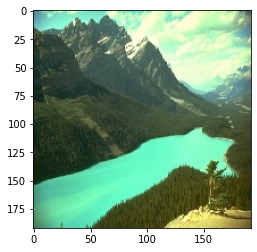

In [ ]:
plt.imshow(HR_train[0])

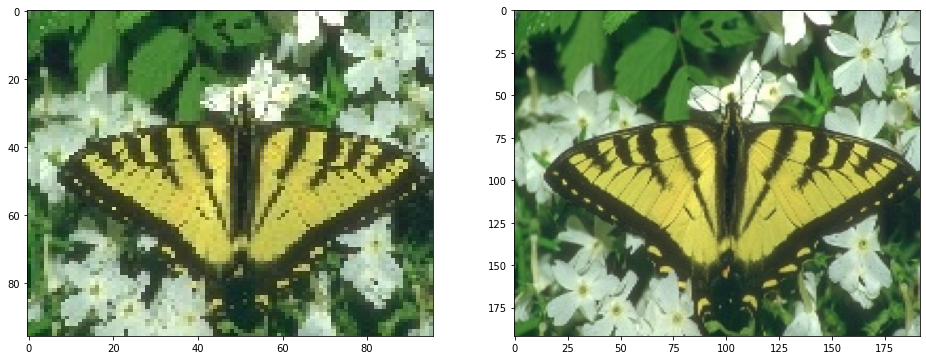

In [ ]:
sample_index = 5

f, ax= plt.subplots(1,2, figsize=(16, 6))
ax[0].imshow(LR_train[sample_index], aspect='auto')
ax[1].imshow(HR_train[sample_index], aspect='auto')
plt.show()

In [ ]:
import tensorflow as tf
from keras.layers import Input, Conv2D, Flatten, Dense, add, BatchNormalization, Activation, LeakyReLU, Layer
from keras.models import Model

In [ ]:
from keras.layers import Conv2D, Conv2DTranspose, Input, Activation, concatenate, add

# function to create model
def build_model(input_shape):
  # input to model
  input_layer = Input(shape=input_shape, name="input")

  # feature representation 
  Conv2D_1 = Conv2D(48, kernel_size=3, strides=1, padding="same", 
                    activation="relu", name="Conv2D_1")(input_layer)

  # Shrinking 
  x = Conv2D(32, kernel_size=3, strides=1, padding="same", 
              activation="relu", name="Conv2D_2")(Conv2D_1)

  # non linear mapping
  x = Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu",
              name="Conv2D_3")(x)
  x = Conv2D(32, kernel_size=3, strides=1, padding="same", activation="linear",
              dilation_rate=2, name="Conv2D_4")(x)
  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="relu",
              name="Conv2D_5")(x)

  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="linear",
              dilation_rate=2, name="Conv2D_6")(x)
  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="relu",
              name="Conv2D_7")(x)

  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="linear",
              dilation_rate=2, name="Conv2D_8")(x)
  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="relu",
              name="Conv2D_9")(x)

  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="linear",
              dilation_rate=2, name="Conv2D_10")(x)
  x = Conv2D(32, kernel_size=5, strides=1, padding="same", activation="relu",
              name="Conv2D_11")(x)

  # Expansion
  x = Conv2D(48, kernel_size=5, strides=1, padding="same", 
                      name="Conv2D_12")(x)
  x = add([Conv2D_1, x])
  x = Activation("relu")(x)

  # Image Reconstruction
  x = Conv2DTranspose(32, kernel_size=4, strides=2, padding="same", 
                      activation="linear", name="Conv2D_13")(x)

  # Extra at the end
  x = Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu", 
              name="Conv2D_14")(x)
  output_layer = Conv2D(filters=input_shape[-1], kernel_size=3, strides=1, 
                        padding="same", activation="relu", name="Conv2D_15")(x)   

  # Create model
  model = Model(inputs=input_layer, outputs=output_layer)      

  return model


In [ ]:
model = build_model(LR_train.shape[1:])
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv2D_1 (Conv2D)              (None, 96, 96, 48)   1344        ['input[0][0]']                  
                                                                                                  
 Conv2D_2 (Conv2D)              (None, 96, 96, 32)   13856       ['Conv2D_1[0][0]']               
                                                                                                  
 Conv2D_3 (Conv2D)              (None, 96, 96, 32)   9248        ['Conv2D_2[0][0]']               
                                                                                            

In [ ]:
batch_size = 5
n_epoch = 100

model.fit(LR_train, HR_train, epochs=n_epoch, batch_size=batch_size, 
              verbose=1)

Epoch 1/100
60/60 [==============================] - 16s 45ms/step - loss: 0.0609 - accuracy: 0.4456
Epoch 2/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0105 - accuracy: 0.6105
Epoch 3/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0075 - accuracy: 0.7146
Epoch 4/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0063 - accuracy: 0.7396
Epoch 5/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0055 - accuracy: 0.7980
Epoch 6/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0051 - accuracy: 0.8199
Epoch 7/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0047 - accuracy: 0.8581
Epoch 8/100
60/60 [==============================] - 3s 45ms/step - loss: 0.0046 - accuracy: 0.8684
Epoch 9/100
60/60 [==============================] - 3s 48ms/step - loss: 0.0045 - accuracy: 0.8773
Epoch 10/100
60/60 [==============================] - 3s 46ms/step - loss: 0.0045 - accuracy: 0.875

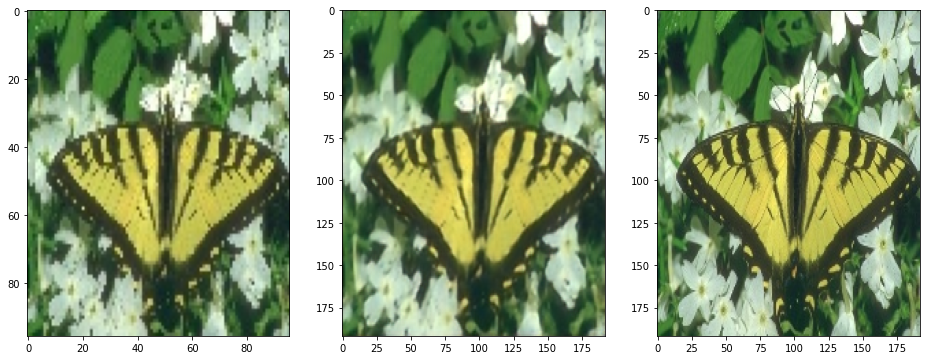

In [ ]:
predicted_img = model.predict(LR_train[np.newaxis, sample_index])[0]

f, ax= plt.subplots(1,3, figsize=(16, 6))
ax[0].imshow(LR_train[sample_index], aspect='auto')
ax[1].imshow(predicted_img, aspect='auto')
ax[2].imshow(HR_train[sample_index], aspect='auto')
plt.show()

In [ ]:
save_samples_dir = "save_samples"

os.makedirs("weights", exist_ok=True)
os.makedirs(save_samples_dir, exist_ok=True)

model_best_weights_directory = "weights/model_best_weights.h5"

In [ ]:
def train(X_train, y_train, X_val, y_val, epochs, batch_size):
    loss = np.array([])
    acc = np.array([])
    val_acc = np.array([])
    val_loss = np.array([])

    for e in range(epochs):
      print("epoch :", e)
      start_time = time.clock()

      for batch in range(len(X_train) // batch_size):
        print("epoch :", e, " of ", epochs, "\t batch : ", batch, " of ", 
              len(X_train) // batch_size)
        
        # generate x training data for batch 
        X_train_data = X_train[batch * batch_size: (batch+1)*batch_size]
        y_train_data = y_train[batch * batch_size: (batch+1)*batch_size]
        
        history = model.fit(X_train_data, y_train_data, 
                            batch_size=batch_size,
                            epochs=1, verbose=0)
    

        loss = np.append(loss, history.history["loss"])
        acc = np.append(loss, history.history["accuracy"])

      [val_l, val_a] = model.evaluate(X_val, y_val, batch_size=batch_size,
                                     verbose=0)
      print("Validation Loss :", val_l, " Validation Acc :", val_a)

      # save best validation model
      if e!=0:
        if val_a > np.max(val_acc):
          model.save_weights("val_best")
          model.save_weights(model_best_weights_directory)

      val_loss = np.append(val_loss, val_l)
      val_acc = np.append(val_acc, val_a)

      print('epoch end :', e, 'time taken :', (time.clock() - start_time) // 60, 
            'min', (time.clock() - start_time) % 60, 'sec')
      
      if e%10 == 0:
        img = model.predict(LR_train[np.newaxis, sample_index])[0]
        img = Image.fromarray(np.uint8(img*255))
        img.save(os.path.join(save_samples_dir, "{}_epoch_result.jpg".format(e)))
      print("\n Model Trained.")

In [ ]:
train(LR_train, HR_train, LR_test, HR_test, 10, batch_size)

epoch : 0
epoch : 0  of  10 	 batch :  0  of  60
epoch : 0  of  10 	 batch :  1  of  60


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


epoch : 0  of  10 	 batch :  2  of  60
epoch : 0  of  10 	 batch :  3  of  60
epoch : 0  of  10 	 batch :  4  of  60
epoch : 0  of  10 	 batch :  5  of  60
epoch : 0  of  10 	 batch :  6  of  60
epoch : 0  of  10 	 batch :  7  of  60
epoch : 0  of  10 	 batch :  8  of  60
epoch : 0  of  10 	 batch :  9  of  60
epoch : 0  of  10 	 batch :  10  of  60
epoch : 0  of  10 	 batch :  11  of  60
epoch : 0  of  10 	 batch :  12  of  60
epoch : 0  of  10 	 batch :  13  of  60
epoch : 0  of  10 	 batch :  14  of  60
epoch : 0  of  10 	 batch :  15  of  60
epoch : 0  of  10 	 batch :  16  of  60
epoch : 0  of  10 	 batch :  17  of  60
epoch : 0  of  10 	 batch :  18  of  60
epoch : 0  of  10 	 batch :  19  of  60
epoch : 0  of  10 	 batch :  20  of  60
epoch : 0  of  10 	 batch :  21  of  60
epoch : 0  of  10 	 batch :  22  of  60
epoch : 0  of  10 	 batch :  23  of  60
epoch : 0  of  10 	 batch :  24  of  60
epoch : 0  of  10 	 batch :  25  of  60
epoch : 0  of  10 	 batch :  26  of  60
epoch : 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


epoch : 1  of  10 	 batch :  2  of  60
epoch : 1  of  10 	 batch :  3  of  60
epoch : 1  of  10 	 batch :  4  of  60
epoch : 1  of  10 	 batch :  5  of  60
epoch : 1  of  10 	 batch :  6  of  60
epoch : 1  of  10 	 batch :  7  of  60
epoch : 1  of  10 	 batch :  8  of  60
epoch : 1  of  10 	 batch :  9  of  60
epoch : 1  of  10 	 batch :  10  of  60
epoch : 1  of  10 	 batch :  11  of  60
epoch : 1  of  10 	 batch :  12  of  60
epoch : 1  of  10 	 batch :  13  of  60
epoch : 1  of  10 	 batch :  14  of  60
epoch : 1  of  10 	 batch :  15  of  60
epoch : 1  of  10 	 batch :  16  of  60
epoch : 1  of  10 	 batch :  17  of  60
epoch : 1  of  10 	 batch :  18  of  60
epoch : 1  of  10 	 batch :  19  of  60
epoch : 1  of  10 	 batch :  20  of  60
epoch : 1  of  10 	 batch :  21  of  60
epoch : 1  of  10 	 batch :  22  of  60
epoch : 1  of  10 	 batch :  23  of  60
epoch : 1  of  10 	 batch :  24  of  60
epoch : 1  of  10 	 batch :  25  of  60
epoch : 1  of  10 	 batch :  26  of  60
epoch : 